# Student Adaptability Levels in Online Education
#### Dylan K. Picart

### Objective
Using a dataset that contains insightful student demographics, build a machine learning model that predicts which how well students would adapt to online education.

## Sourcing Data
I will be using a Kaggle Dataset to predict adaptability to online education. The features in the dataset are critical components in determining the adaptability scores of students. The research publication related to this dataset in available in the link below.

Source: https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

#### Context & Potential Bias in Data
The data was collected during the COVID-19 Pandemic during December 10th, 2020 - Febuary 5th, 2021 from both an online and in-person survey, & the location where the data was collected was in the country of Bangladesh. It is also important to note that the school system in Bangladesh is different to that in the United States: while the US has K-12 as schooling, Bangladesh considers 11th & 12th grade to be college, which is important to note since Education Level is a critical feature in our dataset.

**Important Note:** Since there are only 1205 datapoints in this dataset, it would be unreasonable to broadly assume that the trends we have observed apply to the entire population of Bangladeshi students, considering there are millions of students throughout the country. Unfortunately, not much context beyond a broad description was given, so we do not know the details of how the data was collected, nor in what regions. However, this data could still prove useful to education policy-makers if this data was recorded in a particular region.

##### Useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

#### Load Data

In [2]:
# Load the data from its source format into a pandas dataframe
saoe_data = pd.read_csv('students_adaptability_level_online_education.csv')
df = saoe_data.copy()
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB
(1205, 14) None


In [4]:
df['Adaptivity Level'].value_counts()

Moderate    625
Low         480
High        100
Name: Adaptivity Level, dtype: int64

### Data Cleaning & Wrangling

Next steps would involve creating a class to contain all of our functions we would use for data cleaning so we could pass different datasets and efficiently clean them.

In [5]:
# Show column(s) you're currently inspecting
# Let's check for null values
nulls = (
         f'Null Values in Each Feature\n'
         f'---------------------------\n'
         f'Total Null Values:     {sum(df.isnull().sum())}\n'
         f'{df.isnull().sum()}')

print(nulls)

Null Values in Each Feature
---------------------------
Total Null Values:     0
Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64


## Hypothesis
---
Demographics & access to technological support are important factors in determining whether or not students will properly adapt to online education. Let's consider the following conjecture: A student's age, financial conditions, access to educational support, and technology devices will be significant factors in determining a student's ability to adapt. The higher a student's age, the less likely they are to adapt. The higher the access to support in both technology and education, the better students will adapt. The better a student's financial conditions, the more likely they are to adapt to online education.

To test our hypothesis, we will run an Exploratory Data Analysis & build a Machine Learning Classification Model to identify students according to their Adaptability Levels.

## Exploratory Data Analysis
---

We will explore our independent variables in order to gain contextual information of our dataset soas to avoid unnecessary confusion and misinterpreted data. We will use the insights gained from context to select the features we will use in our Machine Learning Algorithm. After grabbing insights from context we will explore our dependent variable: The Student's Adaptability to Online Education.

In [6]:
# Font dictionaries for formatting
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':12}

In [7]:
# Hacky way to plot the value count for seaborn - We simply add a column that contains all 1's
# Next step is to look into alternative methods
df['Count of Students'] = 1
# To verify, use df.head()

In [8]:
sns.set_theme(rc={'figure.figsize':(6, 5)}, font_scale=1.2)

#### Demographic Context

Let's grab some demographic context in order to see and navigate potential bias.

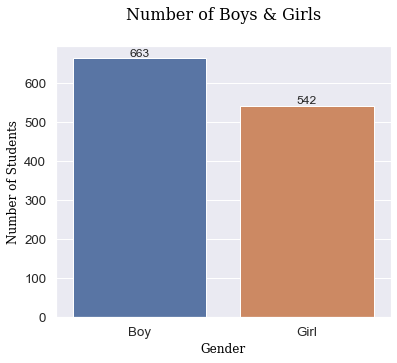

In [9]:
# Setting the order for the sake of consistency in our x-axis comparisons
ax = sns.barplot(x="Gender", y='Count of Students', data=df, estimator=sum, order=['Boy', 'Girl'])
# We bar_label(ax.containers[0], size=12) to extract and display the bar value in the bar plot under an appropriate fontsize
ax.bar_label(ax.containers[0], size=12)
plt.title("Number of Boys & Girls\n", fontdict=font1)
plt.xlabel("Gender", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

There are 121 more boys than there are girls in this dataset. This is aproximately 22.3% more boys than girls in the dataset. This is important to note in ensuring we communicate the insights from our dataset in a balanced manner. While this disparity between the two sexes is not discrediting in and of itself, it is important to note the differences when performing our analysis.

Let's keep gender in mind and explore **Education Level**

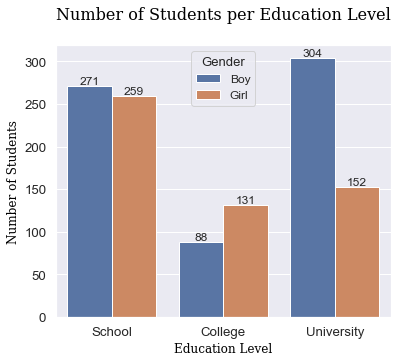

In [10]:
ax = sns.barplot(x="Education Level", y='Count of Students', data=df, estimator=sum, hue='Gender', order=['School', 'College', 'University'])
# Without for loop, ax.containers bar label will only append to the first bar of each container
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Gender', fontsize='12', title_fontsize='13')
plt.title("Number of Students per Education Level\n", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

In college, there are approximately 48.9% more women than there are men in this sample. In schools, there is more or less an even number of boys and girls (only 4.63% more boys); however, in at university, there are 50.0% more men than women in our sample. 

Now let's look at **Financial Conditions**

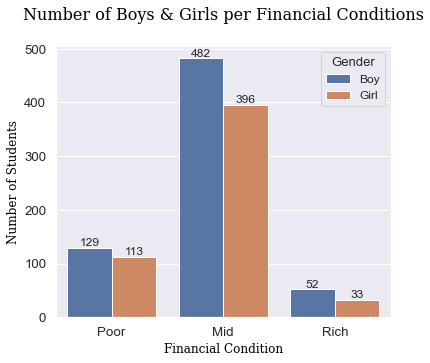

In [11]:
ax = sns.barplot(x="Financial Condition", y='Count of Students', data=df, estimator=sum, hue='Gender', order=['Poor', 'Mid', 'Rich'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Gender', fontsize='12', title_fontsize='13')
plt.title("Number of Boys & Girls per Financial Conditions\n", fontdict=font1)
plt.xlabel("Financial Condition", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

There is a relatively similar disparity between boys and girls in the poor, middle class, and rich financial conditions, with slightly more boys in each class.

**Location in Town**

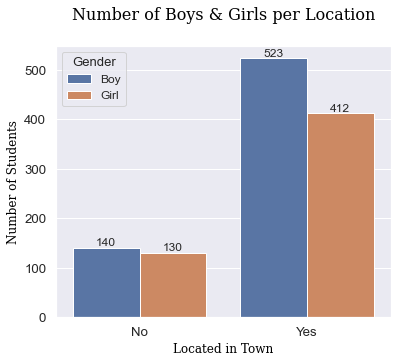

In [12]:
ax = sns.barplot(x="Location", y='Count of Students', data=df, estimator=sum, hue='Gender', order=['No', 'Yes'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Gender', fontsize='12', loc='upper left', title_fontsize='13')
plt.title("Number of Boys & Girls per Location\n", fontdict=font1)
plt.xlabel("Located in Town", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

There are more or less an equal amount of boys and girls who are located out of town (signified by 'No'). However, 44.2% of girls are located in town, as opposed to 55.8% of boys.

#### **Demographic Insights**

From our metrics, prior to running an important analysis on our dependent feature, we have the following context:
* There are more boys than girls in this sample by approximately 22.3% 
* There is a relatively equal number of boys & girls in school (< 5% difference in favor of boys), there are significantly more girls in college than boys (48.8% more girls), but there are significantly more boys than girls in university (50% more boys)
* The financial conditions of both boys & girls are much more balanced; however, based on the sample set having more boys than girls, there tend to be more boys in all three financial conditions, not making this much more insightful

#### Technological Context

To gain even further insight on our dataset, let's examine the Technological aspects of our dataset. We will examine this through examining the students via education level.

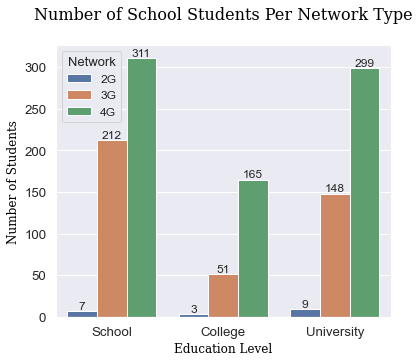

In [13]:
ax = sns.barplot(x="Education Level", y='Count of Students', data=df, estimator=sum, 
                 hue='Network Type', order=['School', 'College', 'University'], hue_order=['2G', '3G', '4G'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Network', fontsize='12', title_fontsize='13')
plt.title("Number of School Students Per Network Type\n", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Fortunately, the majority of students broadly had access to 4G service. However, there were many who had 3G, and a small amount who had only 2G service. There were approximately 35.7% of students who did not have access to 4G service.

**Internet Type**

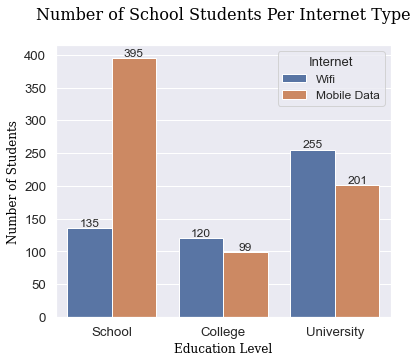

In [14]:
ax = sns.barplot(x="Education Level", y='Count of Students', data=df, estimator=sum, 
                 hue='Internet Type', order=['School', 'College', 'University'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Internet', fontsize='12', title_fontsize='13')
plt.title("Number of School Students Per Internet Type\n", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Here, we see that an overwhelming majority of people in school are using mobile data, approximately 192.6% more than wifi, wheras in higher education the distribution is more balanced, but slightly in favor of wifi usage. Approximately 21.2% for College & 26.9% for University.

**Device**

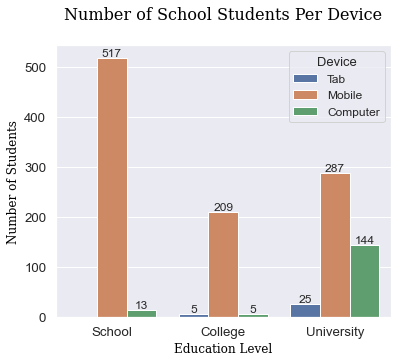

In [15]:
ax = sns.barplot(x="Education Level", y='Count of Students', data=df, estimator=sum, 
                 hue='Device', order=['School', 'College', 'University'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Device', fontsize='12', title_fontsize='13')
plt.title("Number of School Students Per Device\n", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Throughout the education levels, the majority of students use their mobile device for online learning. However, we also should note that there is a 800% increase usage in computers at the university level than anywhere else.

**Learning Management System** 

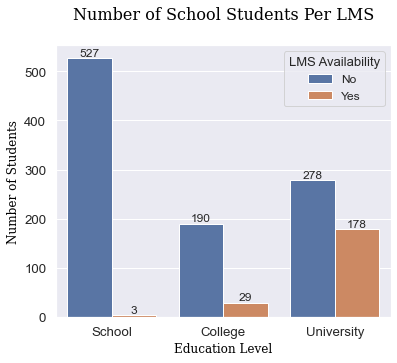

In [16]:
ax = sns.barplot(x="Education Level", y='Count of Students', data=df, estimator=sum, 
                 hue='Self Lms', order=['School', 'College', 'University'])
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='LMS Availability', fontsize='12', title_fontsize='13')
plt.title("Number of School Students Per LMS\n", fontdict=font1)
plt.xlabel("Education Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

#### **Technological Insights**

From our metrics, prior to running an important analysis on our dependent feature, we have the following context:
* There were approximately 35.7% of students who did not have access to 4G service
* An overwhelming majority of students in school are using mobile data
* The majority of students use their mobile device for online learning. However, there is a 800% increase in usage of computers at the university level compared to the other institutions
* The majority of students have no access Learning Management System. This accesibility slightly increases from school to collegem and then drastically at university, with over 39% of students in our university sample having access

#### Analysis of the Adaptability Levels of Students
We are exploring the **Adaptability Levels of Students**, which is our dependent variable. Let's get a general idea of what this looks like.

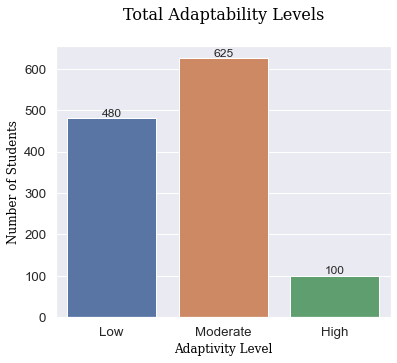

In [17]:
# Setting the order for the sake of consistency in our x-axis comparisons
ax = sns.barplot(x="Adaptivity Level", y='Count of Students', data=df, estimator=sum, order=['Low', 'Moderate', 'High'])
# We bar_label(ax.containers[0], size=12) to extract and display the bar value in the bar plot under an appropriate fontsize
ax.bar_label(ax.containers[0], size=12)
plt.title("Total Adaptability Levels\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

The majority of students are in the low to moderate adaptability levels. Let's investigate the context behind these metrics by considering other features.

**Gender**

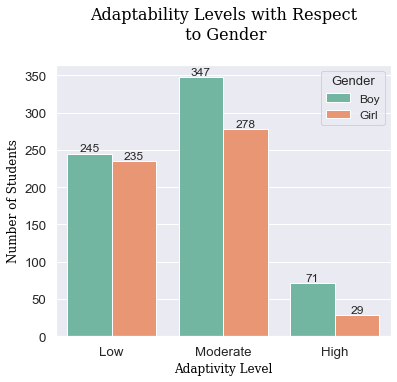

In [18]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Gender', data=df, estimator=sum,
                 order=['Low', 'Moderate', 'High'], palette='Set2')
# Without for loop, ax.containers bar label will only append to the first bar of each container
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Gender', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Gender\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

While there are more boys than girls in this survey, we can see that as the Adaptability levels increase, the disparity between boys and girls increases, indicating that women are less likely to adapt to online education than men.

**Financial Conditions**

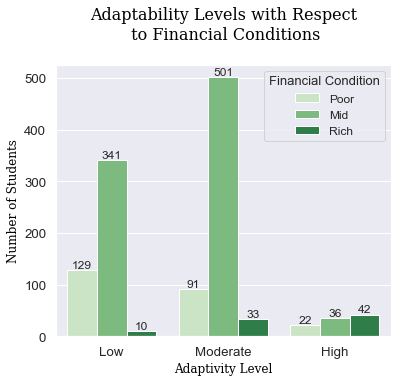

In [19]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Financial Condition', hue_order=['Poor', 'Mid', 'Rich'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Greens')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Financial Condition', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Financial Conditions\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Here, we can see that poor people are more likely to be categorized in the low adaptability levels, middle class people in the moderate adaptability level, and rich people in the higher adaptability level.

**Type of Network**

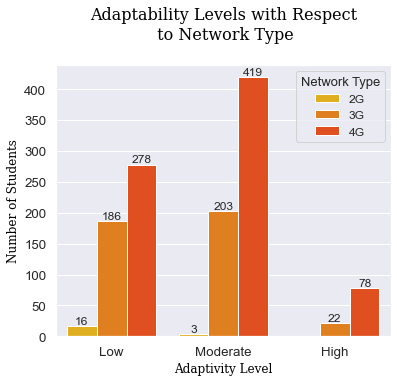

In [20]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Network Type', hue_order=['2G', '3G', '4G'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='autumn_r')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Network Type', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Network Type\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Those with lower networks tend to have a low adaptability level. Those with 3G service are more likely to have a higher adaptability level, while those with 4G tend to have the moderate to high adaptability level. It's important to note the increasing disparity between the respective services as adaptability levels increase.

**Educational Level**

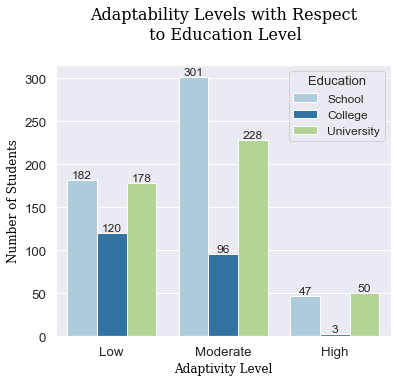

In [21]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Education Level', hue_order=['School', 'College', 'University'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Paired')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Education', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Education Level\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

Oddly enough, higher education does not seem to guarantee a high adaptability, although University graduates outperform college and school alumni in relative high adaptability. Another thing to note is that college graduates tend be in the lower end of the adaptability range, whereas school graduates perform at a moderate level.

Let's look at **Institution Type**

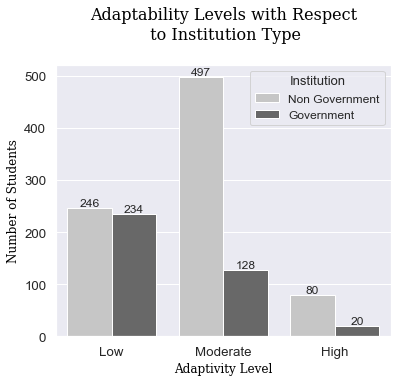

In [22]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Institution Type', hue_order=['Non Government', 'Government'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Greys')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Institution', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Institution Type\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

There is a relatively equal amount of students in both government & non-government institutions that have a low adaptability level, whereas the disparity between moderate institution & high institution are of relatively similar proportions. What is important to note, however is that the majority of students in government institutions have a low adaptability level.

**IT Student**

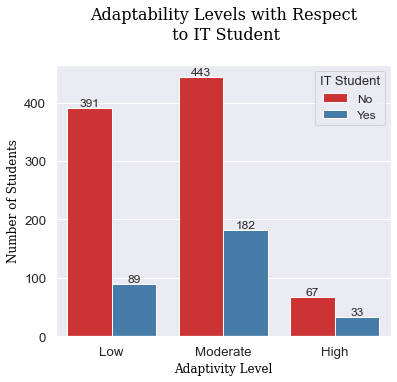

In [23]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='IT Student',
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Set1')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='IT Student', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to IT Student\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

While a majority of students are non-IT students, the majority of IT students tend to have a moderate adaptability to online education, and a proportion of about half of the non-IT students in the high adaptability range.

**Learning Management System**

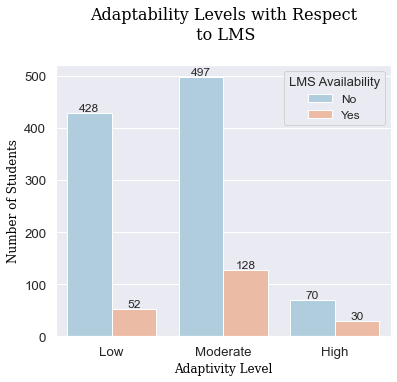

In [24]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Self Lms',
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='RdBu_r')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='LMS Availability', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to LMS\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

The following percentages tell us how many of our students in their respective adaptability levels have access to Learning Management Systems:  
High: 30%  
Moderate: 20.5%  
Low: 10.8%

**Device**

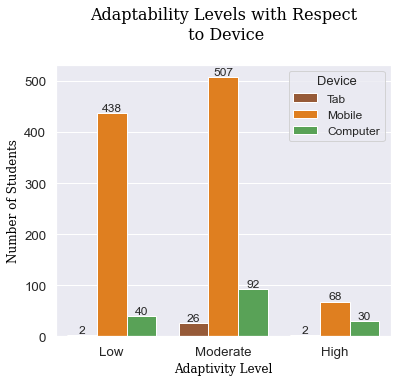

In [25]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Device',
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Set1_r')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Device', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Device\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

The majority of students use mobile devices, however 30% of students in the high adaptability group use computers, as opposed to 14.7% in the moderate range and 8.33% in the low adaptability group.

**Location**

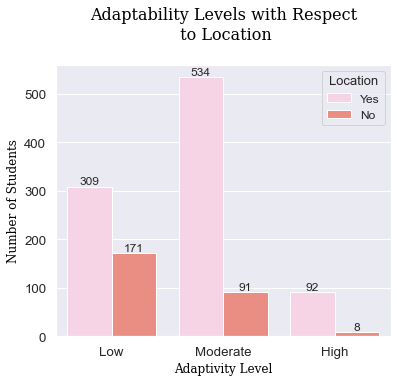

In [26]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Location',
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Set3_r')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Location', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Location\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

92% of students in the high adaptability range were located in town. 35.6% of students in the low adaptability range were not in town, indicating that students who are not in town were more likely to have a lower adaptability range. 14.6% of students in the moderate adaptability range were located out of town.

**Class Duration**

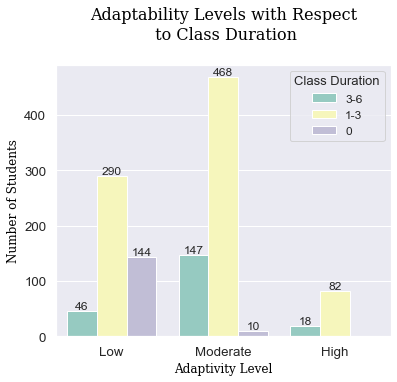

In [27]:
ax = sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Class Duration',
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Set3')
for i in ax.containers:
    ax.bar_label(i, size=12)
plt.legend(title='Class Duration', loc='upper right', fontsize='12', title_fontsize='13')
plt.title("Adaptability Levels with Respect\n to Class Duration\n", fontdict=font1)
plt.xlabel("Adaptivity Level", fontdict=font2), plt.ylabel("Number of Students", fontdict=font2);

The majority of students who had a class duration of less than an hour were more likely to be in the low range. Those with a class duration of 3 - 6 hours were predominantly in the moderate range, and those with 1-3 hours of class were primarily in the high range respectively to the other class durations.

In [28]:
'''
Note for self - I will try to place these plots into one figure for the sake of simplicity & ease of parsing through the notebook.

Option 1:

fig, axs = plt.subplots(nrows=2, ncols=2)
sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Gender', data=df, estimator=sum,
                 order=['Low', 'Moderate', 'High'], palette='RdBu_r', ax=axs[0])
sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Financial Condition', hue_order=['Poor', 'Mid', 'Rich'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Greens', ax=axs[1])
sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Network Type', hue_order=['2G', '3G', '4G'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='autumn_r', ax=axs[2])
sns.barplot(x='Adaptivity Level', y='Count of Students', hue='Education Level', hue_order=['School', 'College', 'University'],
            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Paired')


Option 2:
fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(24,8))
fig.suptitle('Adaptivity Level with Respect to Different Features')

def graph_Maker(hue, palette)
    #Initialize a dictionary
    Curr_Graph = {}
    # Initialize list containing feature values to input into the hue attribute
    x_cols = [i for i in df.columns if 'Adaptivity' not in i and 'Count' not in i]
    #Iterate through dictionary to create multiplot
    for graph in Curr_Graph:
        sns.barplot(x='Adaptivity Level', y='Count of Students', hue={hue}, data=df, estimator=sum,
                    order=['Low', 'Moderate', 'High'], palette={palette}, ax=axs[x, y])

'''

"\nNote for self - I will try to place these plots into one figure for the sake of simplicity & ease of parsing through the notebook.\n\nOption 1:\n\nfig, axs = plt.subplots(nrows=2, ncols=2)\nsns.barplot(x='Adaptivity Level', y='Count of Students', hue='Gender', data=df, estimator=sum,\n                 order=['Low', 'Moderate', 'High'], palette='RdBu_r', ax=axs[0])\nsns.barplot(x='Adaptivity Level', y='Count of Students', hue='Financial Condition', hue_order=['Poor', 'Mid', 'Rich'],\n            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='Greens', ax=axs[1])\nsns.barplot(x='Adaptivity Level', y='Count of Students', hue='Network Type', hue_order=['2G', '3G', '4G'],\n            order=['Low', 'Moderate', 'High'], data=df, estimator=sum, palette='autumn_r', ax=axs[2])\nsns.barplot(x='Adaptivity Level', y='Count of Students', hue='Education Level', hue_order=['School', 'College', 'University'],\n            order=['Low', 'Moderate', 'High'], data=df, estimator=sum

In [29]:
# No more need for counter so let's drop it
df.drop('Count of Students', axis=1, inplace=True)

#### EDA Insights

To explore the insights derived from our demographic and technological features, please refer to the demographic & technology context sections above. From our EDA on Student Adaptability Levels, we discover the following trends: 
* Majority of students are in the low/moderate adaptability levels
* As Adaptability levels increase, so does the disparity between boys and girls, implying that girls are less likely to adapt to online education than boys
* Poor people are more likely to be categorized in the low level, middle class people in the moderate level, and rich people in the high level
* The higher the network type, the likelier it is that the student will be in the moderate to high level. It's important to note the increasing disparity between the respective services as adaptability levels increase.
* University graduates outperform college and school alumni in relative high adaptability. College graduates tend be in the lower end of the adaptability range, & school graduates perform at a moderate level
* Majority of students in government institutions have a low adaptability level
* Majority of IT students tend to have a moderate adaptability to online education
* The higher the Adaptability Level, the more likely students has access to Learning Management Systems
* Majority of students use mobile devices; however, 30% of students in the high adaptability group use computers, which is higher than both moderate & low levels
* Students who had a high adaptability level were most likely to be in town, wheras the more people out of town the lower their adaptability levels
* Majority of students who had a class duration < 1 hr were more likely to be in the low range. Those with a class duration of 3 - 6 hours were predominantly in the moderate range, and those with 1-3 hours of class were primarily in the high range. All of there are respective to the other class durations

## One Hot Encoding & Feature Engineering
---

Fortunately, there are no null values in this dataset, so we can easily proceed. However, these features are not numerical and will not provide meaningful insight for our predictive model unless we one hot encode them. While we can utilize all of our features, for the sake of this algorithm, I will select a few features that seem most appropriate based on our initial hypothesis.

In [30]:
def ohenc(arr_to_convert, converted_df_name):
    # Prepare & reshape column for OHE
    column_as_array = np.array(arr_to_convert).reshape(-1, 1)
    # Initialize our encoder
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    # Fit the column
    enc.fit(column_as_array)
    # Note this is a nested array, so we have to unpack with [0]
    global ec
    ec = enc.categories_[0]
    # Transform column
    ohe_conv_array = enc.transform(column_as_array)
    # Set global variable so we can access created DataFrame outside the function
    global df_ohe
    # Concatenate into a seperate DataFrame to build our model
    df_ohe = pd.DataFrame(data=ohe_conv_array, columns=ec)
    # Finish out by setting the name of df_ohe
    converted_df_name = df_ohe

#### Feature Selection

Since there aren't many different values, we can one hot encode many of these series. Based on our EDA above and the insights we derived from our visuals, we will choose the following features:
* Age Range
* Gender
* Location
* LMS Availability
* Internet Type
* Financial Conditions
* Education Level
* Network Type
* Type of Device

In [31]:
# One hot encode Age, Education Level, Financial Condition
ohenc(df['Age'], age)
#age = df_ohe

ohenc(df['Financial Condition'], fc)
#fc = df_ohe

ohenc(df['Education Level'], ed)
#ed = df_ohe

ohenc(df['Network Type'], net)
#net = df_ohe

ohenc(df['Device'], dev)
#dev = df_ohe

NameError: name 'age' is not defined

In [ ]:
# Since we have a few features that are string binaries (Yes, No; Boy, Girl), 
# we can use the map feature to convert Y & N to 1 & 0, respectively
"""
df.['Gender'] = df['Gender'].map({'Boy': 1, 'Girl': 0})
df['Location'] = df['Location'].map({'Yes': 1 ,'No': 0})
df['Self lms'] = df['Self lms'].map({'Yes': 1, 'No': 0})
df['Internet Type'] = df['Internet Type'].map({'Mobile Data': 1, 'Wifi': 0})
"""

# Since we have many binary string features, let's use: 
df.replace({'Gender': {'Boy': 1, 'Girl': 0}, 
            'Location': {'Yes': 1, 'No': 0},
            'Self Lms': {'Yes': 1, 'No': 0},
            'Internet Type': {'Mobile Data': 1, 'Wifi': 0}}, inplace=True)

# Considering that many of these string features have 2-3 values, it is possible to replace each of them with numerical data; 
# however for the sake of simplicity, we will one hot encode the features greater than binary values

In [ ]:
# Let's One Hot Encode our y feature
ohenc(df['Adaptivity Level'], y)
#y = df_ohe

In [ ]:
# Concatenate our series together
pd.set_option('display.max_columns', None)

conc_df = pd.concat([age, df['Gender'], df['Location'], df['Self Lms'], df['Internet Type'], fc, ed, net, dev, y], axis=1)

#conc_df.rename(columns={'High': 'AL: High', 'Low': 'AL: Low', 'Moderate': 'AL: Moderate'}, inplace=True)

conc_df

,1-5,11-15,16-20,21-25,26-30,6-10,Gender,Location,Self Lms,Internet Type,Mid,Poor,Rich,College,School,University,2G,3G,4G,Computer,Mobile,Tab,High,Low,Moderate
0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1201,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1202,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1203,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Check nulls
sum(conc_df.isnull().sum())

0

**Note**

We want to build a predictive model that predicts the Adaptability Level of our students. However, this by itself is likely not going to work conventionally because there are three categorical variables. Let us try to overcome this problem by one hot encoding the output feature, and running different models on each respective adaptability level. We can explore building a classifier model with three variables another time. For now, let's utilize binary classification.

### Correlations
---
Let's create 3 dataframes containing our different y features

In [ ]:
al_low = conc_df.copy()
al_low.drop(columns=['Moderate', 'High'], inplace=True)

al_mod = conc_df.copy()
al_mod.drop(columns=['Low', 'High'], inplace=True)

al_high = conc_df.copy()
al_high.drop(columns=['Low', 'Moderate'], inplace=True)

These are the three DataFrames we will run our prediction model off of. Let us examine the correlations within these DataFrames

In [ ]:
al_low.corr()['Low']

1-5             -0.103344
11-15           -0.076781
16-20            0.133837
21-25           -0.036564
26-30            0.065476
6-10             0.031025
Gender          -0.065083
Location        -0.257946
Self Lms        -0.141439
Internet Type    0.038268
Mid             -0.033329
Poor             0.137948
Rich            -0.157954
College          0.144021
School          -0.099450
University      -0.012734
2G               0.114732
3G               0.079675
4G              -0.108679
Computer        -0.121903
Mobile           0.159708
Tab             -0.108256
Low              1.000000
Name: Low, dtype: float64

In [ ]:
al_mod.corr()['Moderate']

1-5              0.145843
11-15            0.079954
16-20           -0.059890
21-25            0.010830
26-30           -0.109908
6-10            -0.135729
Gender           0.010418
Location         0.195348
Self Lms         0.083534
Internet Type    0.035374
Mid              0.170346
Poor            -0.143109
Rich            -0.071917
College         -0.075756
School           0.087347
University      -0.029159
2G              -0.091392
3G              -0.035646
4G               0.059039
Computer         0.038830
Mobile          -0.083570
Tab              0.111288
Moderate         1.000000
Name: Moderate, dtype: float64

In [ ]:
al_high.corr()['High']

1-5             -0.080757
11-15           -0.008557
16-20           -0.129037
21-25            0.045274
26-30            0.082873
6-10             0.190778
Gender           0.096629
Location         0.103940
Self Lms         0.099703
Internet Type   -0.131982
Mid             -0.249388
Poor             0.014395
Rich             0.410569
College         -0.118373
School           0.018282
University       0.075411
2G              -0.038076
3G              -0.076832
4G               0.085932
Computer         0.146003
Mobile          -0.132059
Tab             -0.009453
High             1.000000
Name: High, dtype: float64

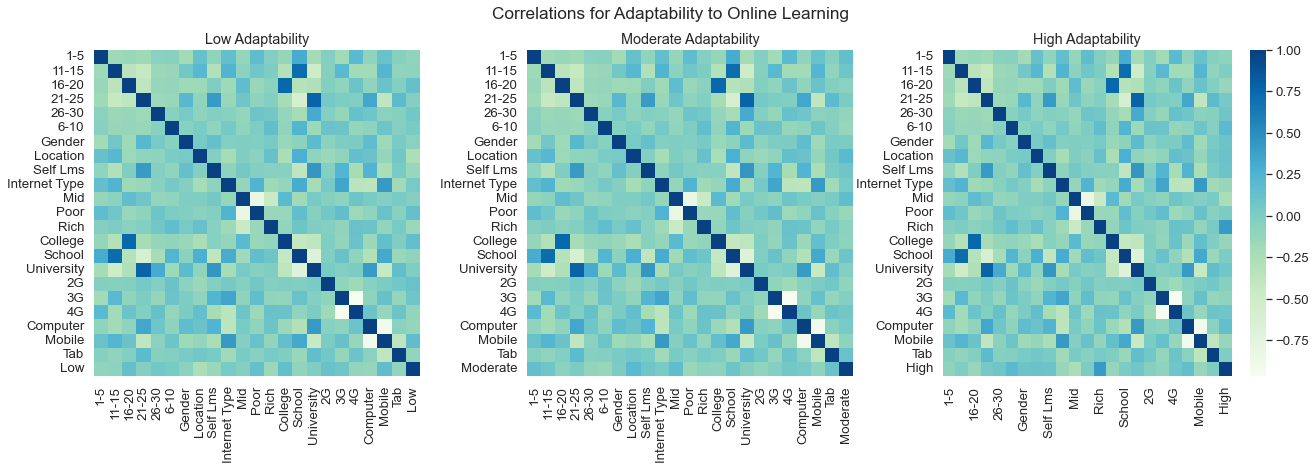

In [ ]:
# Multiplot for corresponding correlations

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6), sharey=False)
fig.suptitle('Correlations for Adaptability to Online Learning')

g1 = sns.heatmap(al_low.corr(), cmap='GnBu', cbar=False, square=True, ax=ax1)
g1.set_title('Low Adaptability')

g2 = sns.heatmap(al_mod.corr(), cmap='GnBu', cbar=False, square=True, ax=ax2)
g2.set_title('Moderate Adaptability')

g3 = sns.heatmap(al_high.corr(), cmap='GnBu', cbar=True, ax=ax3)
g3.set_title('High Adaptability');

These correlation maps describe the relationship between the independent variables and their respective dependent variables. It is important to note that creating three DataFrames for our distinctive output variables inadvertently creates Unbalanced Datasets. While we can run our Machine Learning models on our imbalanced datasets, models perform better being trained on balanced datasets.

## Machine Learning Model
---
We'll create 3 different test/training sets in order to predict the Adapability Levels for High, Moderate, & Low. We will also use four different machine learning models to predict our Student Adapability Levels.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

# X represents our multiple features (variables). Since there are multiple x variables, let's denote as X
l_X = al_low.drop('Low', axis=1)
# y is our output
l_y = al_low['Low']

m_X = al_mod.drop('Moderate', axis=1)
m_y = al_mod['Moderate']

h_X = al_high.drop('High', axis=1)
h_y = al_high['High']

#### Balancing the Datasets

While we can build predictive models based off of imbalanced datasets, it would be beneficial to consider balancing them so that we have more information to train our model on. Let's consider the following methodology: If we have a dataset with high variance, we will opt for undersampling so as not to duplicate our data unnecessarily; if our dataset has low variance, we will opt for oversampling provided that we do not duplicate our data more than twice.

Based on the nature of the discrepancy, we will choose either oversampling or undersampling to balance our respective datasets.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Generate RandomUnderSampler transform object
undersample = RandomUnderSampler(sampling_strategy='majority')

# Generate RandomOverSampler transform object
oversample = RandomOverSampler(sampling_strategy='minority')

# Assign input data and labels to variables "inputs, X" and "outputs, y"
l_inputs, l_outputs = al_low.drop('Low', axis=1), al_low['Low']

m_inputs, m_outputs = al_mod.drop('Moderate', axis=1), al_mod['Moderate']

h_inputs, h_outputs = al_high.drop('High', axis=1), al_high['High']

In [ ]:
# Fit the transform objects
# Undersample
ulX, uly = undersample.fit_resample(l_inputs, l_outputs)
umX, umy = undersample.fit_resample(m_inputs, m_outputs)
uhX, uhy = undersample.fit_resample(h_inputs, h_outputs)

# Oversample
olX, oly = oversample.fit_resample(l_inputs, l_outputs)
omX, omy = oversample.fit_resample(m_inputs, m_outputs)
ohX, ohy = oversample.fit_resample(h_inputs, h_outputs)

While I have over & undersampled all datasets, we will be using Oversampling for Moderate Adaptability, and Undersampling for Low & High Adaptability due to the amount of data we have in our respective samples. We will compare our models with our *weighted* (balanced) data versus our *unweighted* (imbalanced) and compare the accuracy & classification scores of our predictions against each other in our confusion matrices & classification reports.

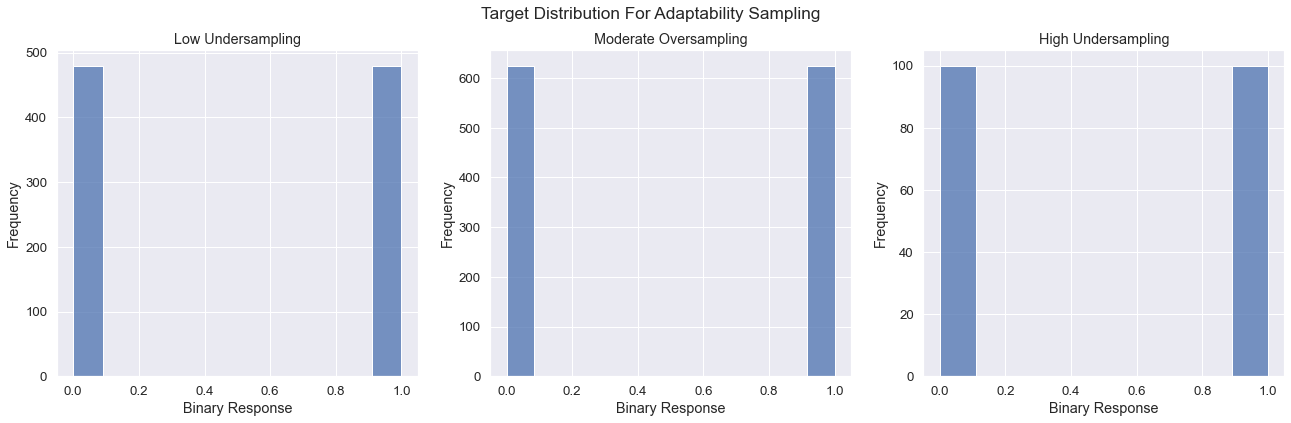

In [ ]:
# Multiplot for corresponding target sample distributions

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(22, 6), sharex=False)
fig.suptitle('Target Distribution For Adaptability Sampling')

d1 = sns.histplot(uly, ax=ax1)
d1.set_title('Low Undersampling')
d1.set_xlabel('Binary Response'), d1.set_ylabel('Frequency')

d2 = sns.histplot(omy, ax=ax2)
d2.set_title('Moderate Oversampling')
d2.set_xlabel('Binary Response'), d2.set_ylabel('Frequency')

d3 = sns.histplot(uhy, ax=ax3)
d3.set_title('High Undersampling')
d3.set_xlabel('Binary Response'), d3.set_ylabel('Frequency');

Note that we will toggle the test_size and random_state attribute to tune our model to for greater accuracy.

In [ ]:
# Original
l_X_train, l_X_test, l_y_train, l_y_test = train_test_split(l_X, l_y, test_size=0.25, random_state=50)
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(m_X, m_y, test_size=0.25, random_state=10)
h_X_train, h_X_test, h_y_train, h_y_test = train_test_split(h_X, h_y, test_size=0.25, random_state=100)

# Balanced
l_uX_train, l_uX_test, l_uy_train, l_uy_test = train_test_split(ulX, uly, test_size=0.25, random_state=50)
m_oX_train, m_oX_test, m_oy_train, m_oy_test = train_test_split(omX, omy, test_size=0.25, random_state=10)
h_uX_train, h_uX_test, h_uy_train, h_uy_test = train_test_split(uhX, uhy, test_size=0.25, random_state=100)

#### Machine Learning Functions

Since building out these ML functions repeatedly is tedious and takes time, I will place them all here for future use.

Imbalanced

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize data list to append mean scores
data = []

def nb_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, t_s=0.25, r_s=50):
    # Initialize empty list for meausring performance
    scores = []
    # Define iterations
    cv = 100

    for i in range(cv):
        # Create model
        gnb = GaussianNB()
        
        # For outside application - do not use when building future functions
        global l_y_test 
        global m_y_test 
        global h_y_test
        # Create train test split
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        # Fit training data to model
        gnb.fit(X_tr, y_tr)
        # Make predictions
        global y_pred
        
        y_pred = gnb.predict(X_ts)
        
        acc = accuracy_score(y_ts, y_pred)
        
        scores.append(acc)
        
        global basic_cv
        
        basic_cv = np.mean(scores)
    # Append to data list to use in dataframe comparison - don't use when building future functions    
    data.append(basic_cv)

In [ ]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

def kn_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, n=5, t_s=0.2, r_s=50):
    scores = []
    cv = 100

    for i in range(cv):
        
        knn = KNeighborsClassifier(n_neighbors=n)
        
        # For outside application - do not use when building future functions
        global l_y_test 
        global m_y_test 
        global h_y_test
                
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        
        knn.fit(X_tr, y_tr)
        
        global y_pred
        
        y_pred = knn.predict(X_ts)
        
        acc = accuracy_score(y_ts, y_pred)
        
        scores.append(acc)
        
        global basic_cv
        
        basic_cv = np.mean(scores)
        
    data.append(basic_cv)

In [ ]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

def rf_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, n=100, t_s=0.2, r_s=50):
    scores = []
    cv = 100

    for i in range(cv):
        
        clf = RandomForestClassifier(n_estimators=n)
        
        # For outside application - do not use when building future functions
        global l_y_test 
        global m_y_test 
        global h_y_test
                
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        
        clf.fit(X_tr, y_tr)
        
        global y_pred
        
        y_pred = clf.predict(X_ts)
        
        acc = accuracy_score(y_ts, y_pred)
        
        scores.append(acc)
        
        global basic_cv
        
        basic_cv = np.mean(scores)
        
    data.append(basic_cv)

Balanced

In [ ]:
# Naive Bayes
def bnb_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, t_s=0.25, r_s=50):
    # Initialize empty list for meausring performance
    scores = []
    cv = 100

    for i in range(cv):
        # Create model
        gnb = GaussianNB()
        
        # For outside application - do not use when building future functions
        global l_uy_test 
        global m_oy_test 
        global h_uy_test
        
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        
        gnb.fit(X_tr, y_tr)
        
        global by_pred
        
        by_pred = gnb.predict(X_ts)
        
        acc = accuracy_score(y_ts, by_pred)
        
        scores.append(acc)
        
        global b_basic_cv
        
        b_basic_cv = np.mean(scores)

In [ ]:
# KNeighbors Classifier
def bkn_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, n=5, t_s=0.2, r_s=50):
    scores = []
    cv = 100

    for i in range(cv):
        
        knn = KNeighborsClassifier(n_neighbors=n)
        
        # For outside application - do not use when building future functions
        global l_uy_test 
        global m_oy_test 
        global h_uy_test
                
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        
        knn.fit(X_tr, y_tr)
        
        global by_pred
        
        by_pred = knn.predict(X_ts)
        
        acc = accuracy_score(y_ts, by_pred)
        
        scores.append(acc)
        
        global b_basic_cv
        
        b_basic_cv = np.mean(scores)

In [ ]:
# Random Forests
def brf_basic_cv(X, y, X_tr, X_ts, y_tr, y_ts, n=100, t_s=0.2, r_s=50):
    scores = []
    cv = 100

    for i in range(cv):
        
        clf = RandomForestClassifier(n_estimators=n)
        
        # For outside application - do not use when building future functions
        global l_uy_test 
        global m_oy_test 
        global h_uy_test
                
        X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=t_s, random_state=r_s)
        
        clf.fit(X_tr, y_tr)
        
        global by_pred
        
        by_pred = clf.predict(X_ts)
        
        acc = accuracy_score(y_ts, by_pred)
        
        scores.append(acc)
        
        global b_basic_cv
        
        b_basic_cv = np.mean(scores)

Note: Good practice would be to use Cross Validation for our balanced Dataset as well; however, with the design of our machine learning function, we will avoid using this approach and assume that the scores we get are within the bounds of our initial accuracy score.

KFold Cross Validation yields at times significantly lower accuracy scores. Until I can figure out why this is the case, I will refrain from using this method until I toggle the n_splits attribute. However, I will leave the code below so that it can be easily applied to the other models if the accuracy scores are equivalent or better than Basic Cross Validation.

In [ ]:
# KFold Cross Validation
'''
def nb_kfold_xv(X, y, X_tr, X_ts, y_tr, y_ts, n_spl=10, shuf=True):
    scores = []

    kf = KFold(n_splits=n_spl, shuffle=shuf)

    # Create KFold Cross Validation Loop
    for train_index, test_index in kf.split(X_tr):
        # Use index to create training and testing subsets
        X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
        y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
        
        gnb = GaussianNB()
        
        # For outside application - do not use when building future functions
        global l_y_test 
        global m_y_test 
        global h_y_test
            
        gnb.fit(X_tr, y_tr)
        
        y_pred = gnb.predict(X_ts)
        
        acc = accuracy_score(y_ts, y_pred)
        
        scores.append(acc)
        
        global kfold
        
        kfold = np.mean(scores)
        
    data.append(kfold)
        
print(f'KFold Cross Validated Mean Accuracy Score: {kfold}')
'''

Comparison

In [ ]:
def confusion_matrix_comparison():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), sharey=False)
    fig.suptitle('Balanced vs. Imbalanced Class Predictions')

    # Transpose the confusion matrices
    cm1 = sns.heatmap(imb_conf_mat.T, annot=True, cbar=True, cmap='BrBG', ax=ax1)
    cm1.set_title('Imbalanced Dataset')

    cm2 = sns.heatmap(bal_conf_mat.T, annot=True, cbar=True, cmap='BrBG', ax=ax2)
    cm2.set_title('Balanced Dataset')
    plt.show();

### Naïve Bayes Classification
---

Since we One Hot Encoded our Adaptability Level feature, we will be building a Naïve Bayes Classification model since we are using Binary Classification to predict the Adaptability Levels of our students. Since we have three different y outputs to run a Binary Classification model over, we will designate X & y relative to their respective features.

#### Low Adaptability

In [ ]:
# Original Data
# Gaussian Naïve Bayes application with y as Low Adaptability feature
gnb = GaussianNB()

# Fit our training model
gnb.fit(l_X_train, l_y_train)

# Designate our y-predicted
l_y_pred = gnb.predict(l_X_test)

# Model accuracy based on the parameters from test_train_split
l_acc = f'Accuracy Score: {accuracy_score(l_y_test, l_y_pred)}'
print(l_acc)

Accuracy Score: 0.6986754966887417


In [ ]:
# Balanced Data
gnb = GaussianNB()
gnb.fit(l_uX_train, l_uy_train)
l_uy_pred = gnb.predict(l_uX_test)

l_uacc = f'Accuracy Score: {accuracy_score(l_uy_test, l_uy_pred)}'
print(l_uacc)

Accuracy Score: 0.75


While this accuracy is important to consider, we will be using Cross Validation in our Model Evaluation to determine the mean accuracy of the predictions.

##### Model Evaluation

Cross Validation

In [ ]:
# Original
nb_basic_cv(l_X, l_y, l_X_train, l_X_test, l_y_train, l_y_test, t_s=0.25, r_s=50)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.6986754966887413


In [ ]:
# Balanced
bnb_basic_cv(ulX, uly, l_uX_train, l_uX_test, l_uy_train, l_uy_test, t_s=0.25, r_s=50)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.75


Confusion Matrix & Classification Report

A confusion matrix is a table that is used to evaluate the performance of a classification model. The number of correct and incorrect predictions are summed up via class. While the accuracy tells us the percentage of correct predictions, it's important to understand the breakdown of these predictions with respect to true positives & true negatives. While an imbalanced ratio of true positives & true negatives may indicate an unbalanced dataset, it does not necessarily indicate that we don't have insightful data.

Consider the following confusion matrix:

$$ \text{Confusion Matrix} = \begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix}$$

TP & FP represent True Positives & False Positives, while FN & TN represent False Negatives & True Negatives, respectively. Let us examine the confusion matrices of our balanced and imbalanced datasets.

In [ ]:
# Create a confusion matrix using our true values & predicted values
imb_conf_mat = confusion_matrix(l_y_test, y_pred)
bal_conf_mat = confusion_matrix(l_uy_test, by_pred)

# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[126  55]
 [ 36  85]] 
Balanced 
------------ 
[[ 70  40]
 [ 20 110]]


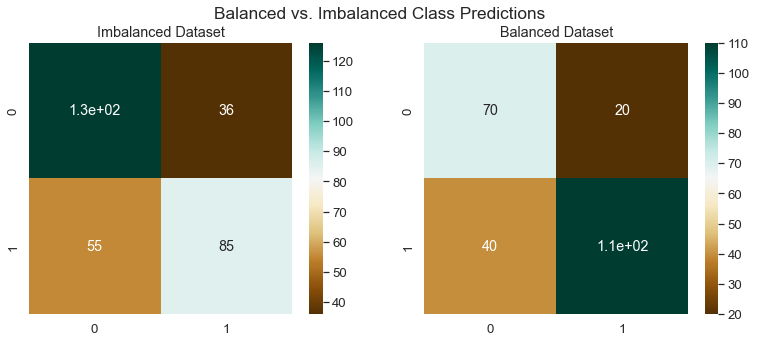

In [ ]:
# Let's examine this visually
confusion_matrix_comparison()

The first Confusion Matrix is an unbalanced dataset due to the imbalanced classification selection between true positives & false negatives. We have a 211 : 91 Correct to Incorrect prediction ratio which gives us direct insight into Accuracy, suggesting an okay accuracy score.  
The second is a balanced dataset where we used undersampling. We have a 174: 66 Correct to Incorrect prediction ratio, suggesting that our balanced dataset yields a slightly higher prediction ratio.

Recall that: 

$Accuracy = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$

$Precision = \frac {TP}{FP+TN}$ 

$Recall = \frac {TP}{FN+TP}$

Accuracy by itself does not give us insight to the strength behind our model's ability to classify effectively. Precision gives us insight into the relevancy of our model's results; it is the percent of positively classified samples that were correctly classified. Recall gives us insight into how correctly our model returns relevant results; it measures the ratio of positive values that are correctly classified. I'll conduct further evaluation of the model through the analysis of its recall & precision. The F1 score is the harmonic mean between Recall & Precision.

In [ ]:
# Note: Depending on our dataset & the context behind what we are trying to determine, we need to determine whether achieving a high recall 
# is more important than getting a high precision, vice versa, or whether both are equally important. 
# We can opt for the latter through our F1 score.
lcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(l_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(l_uy_test, by_pred)}')

print(lcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.73       181
         1.0       0.61      0.70      0.65       121

    accuracy                           0.70       302
   macro avg       0.69      0.70      0.69       302
weighted avg       0.71      0.70      0.70       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.64      0.70       110
         1.0       0.73      0.85      0.79       130

    accuracy                           0.75       240
   macro avg       0.76      0.74      0.74       240
weighted avg       0.75      0.75      0.75       240



Our Naïve Bayes Low Adaptability Classification model has a 61% precision score, 70% recall score, and 65% F1 score, while our model built from our balanced dataset has a 71% precision score, 84% recall score, and 77% F1 score. For the sake of considering stronger classification metrics beyond accuracy, we will consider our Balanced Dataset in the following summary.   
This means the following:

* **Precision**: Out of all the students the model predicted would have a Low Adaptability score, **71%** of them actually were
* **Recall**: Out of all the students who actually had a Low Adaptability score, the model predicted the outcome correctly for **84%** of the students
* We have an **F1 Score** of **0.77**, which tells us the the model we built does an *okay* job at predicting whether of not students have a Low Adaptability score

#### Moderate Adaptability

In [ ]:
# Original
gnb = GaussianNB()
gnb.fit(m_X_train, m_y_train)
m_y_pred = gnb.predict(m_X_test)

m_acc = f'Accuracy Score: {accuracy_score(m_y_test, m_y_pred)}'
print(m_acc)

Accuracy Score: 0.6357615894039735


In [ ]:
# Balanced
gnb = GaussianNB()
gnb.fit(m_oX_train, m_oy_train)
m_oy_pred = gnb.predict(m_oX_test)

m_oacc = f'Accuracy Score: {accuracy_score(m_oy_test, m_oy_pred)}'
print(m_oacc)

Accuracy Score: 0.6389776357827476


##### Model Evaluation

Cross Validation

In [ ]:
# Original
nb_basic_cv(m_X, m_y, m_X_train, m_X_test, m_y_train, m_y_test, t_s=0.25, r_s=10)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.6357615894039735


In [ ]:
# Balanced
bnb_basic_cv(omX, omy, m_oX_train, m_oX_test, m_oy_train, m_oy_test, t_s=0.25, r_s=10)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.6389776357827476


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(m_y_test, y_pred)
bal_conf_mat = confusion_matrix(m_oy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[ 68  62]
 [ 48 124]] 
Balanced 
------------ 
[[ 73  73]
 [ 40 127]]


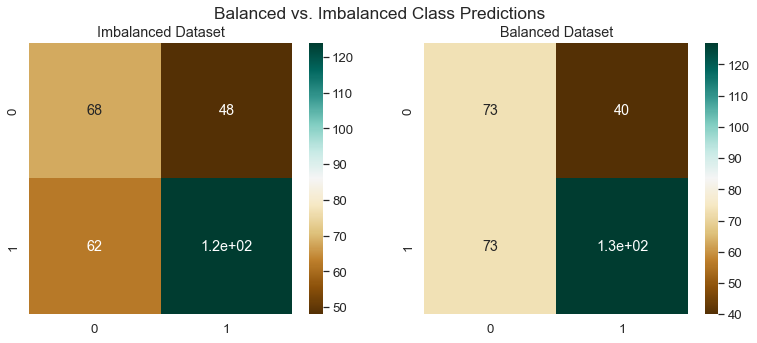

In [ ]:
confusion_matrix_comparison()

We have a 192 : 110 Correct to Incorrect prediction ratio for our original data, which suggests an okay accuracy score. Our balanced data has a 204 : 109 Correct to Incorrect prediction ratio, which indicates a slightly better ratio than our imbalanced data.

In [ ]:
mcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(m_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(m_oy_test, by_pred)}')

print(mcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55       130
         1.0       0.67      0.72      0.69       172

    accuracy                           0.64       302
   macro avg       0.63      0.62      0.62       302
weighted avg       0.63      0.64      0.63       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.65      0.50      0.56       146
         1.0       0.64      0.76      0.69       167

    accuracy                           0.64       313
   macro avg       0.64      0.63      0.63       313
weighted avg       0.64      0.64      0.63       313



Our Naïve Bayes Moderate Adaptability Classification model built from our original data has a 67% precision score, 72% recall score, and 69% F1 score, while our model built from our balanced data has a 64% precision score, 79% recall score, and 71% F1 score. We will consider our Balanced Dataset in the following summary.   
This means the following:

* **Precision**: Out of all the students the model predicted would have a Moderate Adaptability score, **64%** of them actually were
* **Recall**: Out of all the students who actually had a Moderate Adaptability score, the model predicted the outcome correctly for **79%** of the students
* We have an **F1 Score** of **0.71**, which tells us the the model we built does an *okay* job at predicting whether of not students have a Moderate Adaptability score

#### High Adaptability

In [ ]:
# Original
gnb = GaussianNB()
gnb.fit(h_X_train, h_y_train)
h_y_pred = gnb.predict(h_X_test)

h_acc = f'Accuracy Score: {accuracy_score(h_y_test, h_y_pred)}'
print(h_acc)

Accuracy Score: 0.32450331125827814


In [ ]:
# Balanced
gnb = GaussianNB()
gnb.fit(h_uX_train, h_uy_train)
h_uy_pred = gnb.predict(h_uX_test)

h_uacc = f'Accuracy Score: {accuracy_score(h_uy_test, h_uy_pred)}'
print(h_uacc)

Accuracy Score: 0.62


##### Model Evaluation

Cross Validation

In [ ]:
# Original
nb_basic_cv(h_X, h_y, h_X_train, h_X_test, h_y_train, h_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.32450331125827825


In [ ]:
# Balanced
bnb_basic_cv(uhX, uhy, h_uX_train, h_uX_test, h_uy_train, h_uy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.6199999999999999


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(h_y_test, y_pred)
bal_conf_mat = confusion_matrix(h_uy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[ 73 204]
 [  0  25]] 
Balanced 
------------ 
[[ 5 17]
 [ 2 26]]


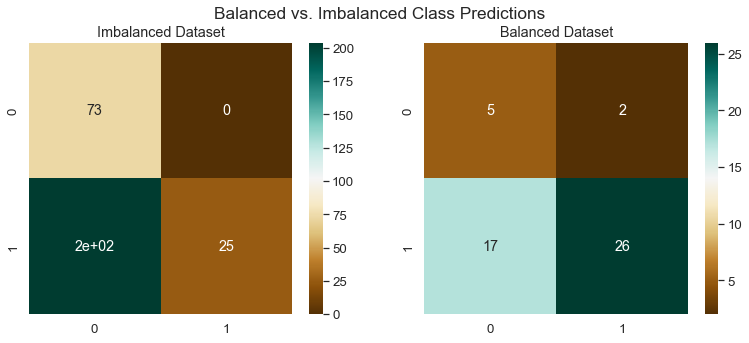

In [ ]:
confusion_matrix_comparison()

We have a 75 : 227 Correct to Incorrect prediction ratio for our original data, which suggests a very poor accuracy score. Our balanced data has a 36 : 14 Correct to Incorrect prediction ratio, which is a significantly better ratio than our imbalanced data which tends to classify positives as negatives.

In [ ]:
hcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(h_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(h_uy_test, by_pred)}')

print(hcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.26      0.42       277
         1.0       0.11      1.00      0.20        25

    accuracy                           0.32       302
   macro avg       0.55      0.63      0.31       302
weighted avg       0.93      0.32      0.40       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.23      0.34        22
         1.0       0.60      0.93      0.73        28

    accuracy                           0.62        50
   macro avg       0.66      0.58      0.54        50
weighted avg       0.65      0.62      0.56        50



Our Naïve Bayes High Adaptability Classification model has an 8% precision score, 72% recall, and 14% F1 score, while our model built from our balanced data has a 75% precision score, 75% recall score, and 75% F1 score. We will consider our Balanced Dataset in the following summary.  
This means the following:

* **Precision**: Out of all the students the model predicted would have a High Adaptability score, **75%** of them actually were
* **Recall**: Out of all the students who actually had a High Adaptability score, the model predicted the outcome correctly for **75%** of the students
* We have an **F1 Score** of **0.75**, which tells us the the model we built does an *okay* job at predicting whether of not students have a High Adaptability score

#### Mean Value of Accuracy Scores

In [ ]:
np.mean(data[0:3])

0.5529801324503311

In [ ]:
# Mean of the three different adaptability level accuracy scores
mac = round(np.mean(data[0:3]), 5)
data.append(mac)
print(f'Average Prediction Accuracy Score: {mac}')

Average Prediction Accuracy Score: 0.55298


Regarding our low and moderate adaptability, we have a relatively decent predictor model. We can improve upon these models through excluding features that have low correlations relative to their respective y features. Our Naïve Bayes model falls short in accurately predicting the high adaptability y output, likely due to the significantly lesser data points, as well as overfeeding our model with observations that have minimal effect on our output. If we were to base the accuracy of our predictive model based off the mean of our scores, we can see that we built a model with a prediction accuracy of about 55%.

### K Nearest Neighbors
---
KNN is an algorithm that contains no assumptions for underlying data distribution. which is helpful since this dataset doesn't follow mathematical theoretical assumptions. It also does not need any training data points for model generation, since it uses all of the data in the testing phase. This makes our training phase faster and testing phase slower and more expensive. Let's build a KNN algorithm and see if we can come up with better prediction scores for our respective output features.

#### Low Adaptability

In [ ]:
# Original
# Create KNN Classifier & set n_neighbors attribute to 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(l_X_train, l_y_train)
l_y_pred = knn.predict(l_X_test)

l_acc = f'Accuracy Score: {accuracy_score(l_y_test, l_y_pred)}'
print(l_acc)

Accuracy Score: 0.7947019867549668


In [ ]:
# Balanced
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(l_uX_train, l_uy_train)
l_uy_pred = knn.predict(l_uX_test)

l_uacc = f'Accuracy Score: {accuracy_score(l_uy_test, l_uy_pred)}'
print(l_uacc)

Accuracy Score: 0.725


##### Model Evaluation

Cross Validation

In [ ]:
kn_basic_cv(l_X, l_y, l_X_train, l_X_test, l_y_train, l_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.8344370860927154


In [ ]:
bkn_basic_cv(ulX, uly, l_uX_train, l_uX_test, l_uy_train, l_uy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.7791666666666667


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(l_y_test, y_pred)
bal_conf_mat = confusion_matrix(l_uy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[116  65]
 [ 73  48]] 
Balanced 
------------ 
[[49 61]
 [65 65]]


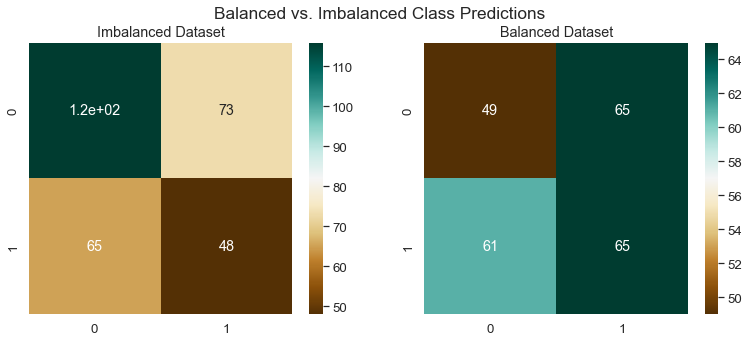

In [ ]:
confusion_matrix_comparison()

We have a 164 : 138 Correct to Incorrect prediction ratio for our original data, which suggests an okay accuracy score. It does not do well in predicting true negatives. Our balanced data has a 177 : 63 Correct to Incorrect prediction ratio, which indicates a significantly better ratio than our imbalanced data.

In [ ]:
lcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(l_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(l_uy_test, by_pred)}')

print(lcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63       181
         1.0       0.42      0.40      0.41       121

    accuracy                           0.54       302
   macro avg       0.52      0.52      0.52       302
weighted avg       0.54      0.54      0.54       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.43      0.45      0.44       110
         1.0       0.52      0.50      0.51       130

    accuracy                           0.48       240
   macro avg       0.47      0.47      0.47       240
weighted avg       0.48      0.47      0.48       240



Our K Nearest Neighbor Low Adaptability Classification model has a 43% precision score, 40% recall, and 41% F1 score, while our model built from our balanced data has a 74% precision score, 79% recall score, and 77% F1 score. We will consider our Balanced Dataset in the following summary.   
This means the following:

* **Precision**: Out of all the students the model predicted would have a Low Adaptability score, **74%** of them actually were
* **Recall**: Out of all the students who actually had a Low Adaptability score, the model predicted the outcome correctly for **79%** of the students
* We have an **F1 Score** of **0.77**, which tells us the the model we built does an *okay* job at predicting whether of not students have a Low Adaptability score

#### Moderate Adaptability

In [ ]:
# Original
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(m_X_train, m_y_train)
m_y_pred = knn.predict(m_X_test)

m_acc = f'Accuracy Score: {accuracy_score(m_y_test, m_y_pred)}'
print(m_acc)

Accuracy Score: 0.7615894039735099


In [ ]:
# Balanced
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(m_oX_train, m_oy_train)
m_oy_pred = knn.predict(m_oX_test)

m_oacc = f'Accuracy Score: {accuracy_score(m_oy_test, m_oy_pred)}'
print(m_oacc)

Accuracy Score: 0.7827476038338658


##### Model Evaluation

Cross Validation

In [ ]:
# Original
kn_basic_cv(m_X, m_y, m_X_train, m_X_test, m_y_train, m_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.8211920529801325


In [ ]:
# Balanced
bkn_basic_cv(omX, omy, m_oX_train, m_oX_test, m_oy_train, m_oy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.8210862619808306


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(m_y_test, y_pred)
bal_conf_mat = confusion_matrix(m_oy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[66 64]
 [78 94]] 
Balanced 
------------ 
[[72 74]
 [83 84]]


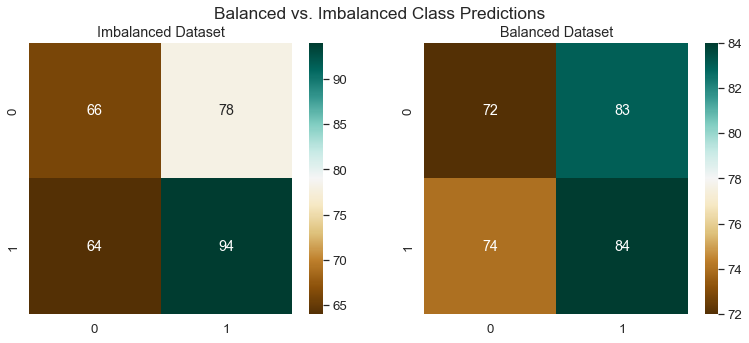

In [ ]:
confusion_matrix_comparison()

We have a 160 : 142 Correct to Incorrect prediction ratio, which suggests an okay accuracy score. Our balanced data has a 245 : 68 Correct to Incorrect prediction ratio, which indicates a significantly better ratio than our imbalanced data.

In [ ]:
mcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(m_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(m_oy_test, by_pred)}')

print(mcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.46      0.51      0.48       130
         1.0       0.59      0.55      0.57       172

    accuracy                           0.53       302
   macro avg       0.53      0.53      0.53       302
weighted avg       0.54      0.53      0.53       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.46      0.49      0.48       146
         1.0       0.53      0.50      0.52       167

    accuracy                           0.50       313
   macro avg       0.50      0.50      0.50       313
weighted avg       0.50      0.50      0.50       313



Our K Nearest Neighbor Moderate Adaptability Classification model has a 59% precision score, 55% recall score, and 57% F1 score, while our model built from our balanced data has a 79% precision score, 80% recall score, and 80% F1 score. We will consider our Balanced Dataset in the following summary.   
This means the following:

* **Precision**: Out of all the students the model predicted would have a Moderate Adaptability score, **79%** of them actually were
* **Recall**: Out of all the students who actually had a Moderate Adaptability score, the model predicted the outcome correctly for **80%** of the students
* We have an **F1 Score** of **0.80**, which tells us the the model we built does a *good* job at predicting whether of not students have a Moderate Adaptability score

#### High Adaptability

In [ ]:
# Original
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(h_X_train, h_y_train)
h_y_pred = knn.predict(h_X_test)

h_acc = f'Accuracy Score: {accuracy_score(h_y_test, h_y_pred)}'
print(h_acc)

Accuracy Score: 0.9668874172185431


In [ ]:
# Balanced
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(h_uX_train, h_uy_train)
h_uy_pred = knn.predict(h_uX_test)

h_uacc = f'Accuracy Score: {accuracy_score(h_uy_test, h_uy_pred)}'
print(h_uacc)

Accuracy Score: 0.74


##### Model Evaluation

Cross Validation

In [ ]:
# Original
kn_basic_cv(h_X, h_y, h_X_train, h_X_test, h_y_train, h_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.9668874172185434


In [ ]:
# Balanced
bkn_basic_cv(uhX, uhy, h_uX_train, h_uX_test, h_uy_train, h_uy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.7399999999999999


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(h_y_test, y_pred)
bal_conf_mat = confusion_matrix(h_uy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[272   5]
 [  5  20]] 
Balanced 
------------ 
[[16  6]
 [ 7 21]]


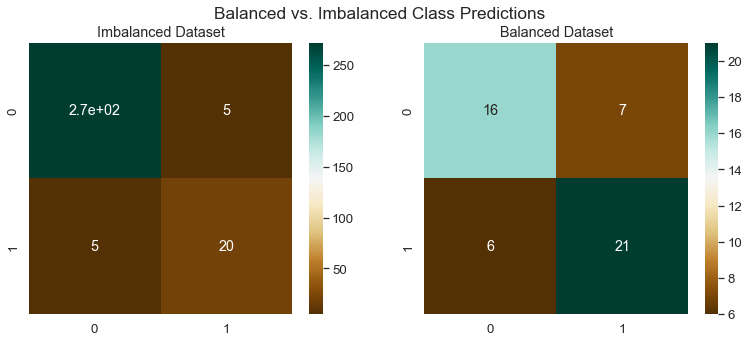

In [ ]:
confusion_matrix_comparison()

We have a 292 : 10 Correct to Incorrect prediction ratio, which suggests a great accuracy score. Our balanced data has a 34 : 16 Correct to Incorrect prediction ratio, which indicates a significantly worse ratio than our imbalanced data.

In [ ]:
hcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(h_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(h_uy_test, by_pred)}')

print(hcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       277
         1.0       0.80      0.80      0.80        25

    accuracy                           0.97       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.97      0.97      0.97       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.70      0.73      0.71        22
         1.0       0.78      0.75      0.76        28

    accuracy                           0.74        50
   macro avg       0.74      0.74      0.74        50
weighted avg       0.74      0.74      0.74        50



Our K Nearest Neighbor High Adaptability Classification model has an 80% precision score, 80% recall, and 80% F1 score, while our model built from our balanced data has a 74% precision score, 79% recall score, and 77% F1 score. We will consider our Imbalanced Dataset in the following summary, as it contains better metrics than our balanced dataset.   
This means the following:

* **Precision**: Out of all the students the model predicted would have a High Adaptability score, **80%** of them actually were
* **Recall**: Out of all the students who actually had a High Adaptability score, the model predicted the outcome correctly for **80%** of the students
* We have an **F1 Score** of **0.80**, which tells us the the model we built does a good job at predicting whether of not students have a High Adaptability score

#### Mean Vaule of Accuracy Scores

In [ ]:
mac = round(np.mean(data[4:7]), 5)
data.append(mac)
print(f'Average Prediction Accuracy Score: {mac}')

Average Prediction Accuracy Score: 0.87417


Regarding our High Adaptability predictor, our KNearest Neighbors algorithm is significantly better at predicting which students properly adapt to online education, with approximately a 96% accuracy. In regards to Low and Moderate Adaptability, our KNearest Neighbors algorithm is similar to our Naïve Bayes Classification Model, with a slight improvement overall, yet still in the 70% range. Overall, the model's is able to predict the Adaptability Level of students with an accuracy of approximately 82%, which is a significant improvement from our Naïve Bayes model. However, this model takes longer to run.

### Random Forests
---
Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance. 

#### Low Adaptability

In [ ]:
# Original
# Create a Gaussian Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)
# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(l_X_train, l_y_train)
l_y_pred = clf.predict(l_X_test)

l_acc = f'Accuracy Score: {accuracy_score(l_y_test, l_y_pred)}'
print(l_acc)

Accuracy Score: 0.8377483443708609


In [ ]:
# Balanced
clf = RandomForestClassifier(n_estimators=100)
clf.fit(l_uX_train, l_uy_train)
l_uy_pred = clf.predict(l_uX_test)

l_uacc = f'Accuracy Score: {accuracy_score(l_uy_test, l_uy_pred)}'
print(l_uacc)

Accuracy Score: 0.8


##### Model Evaluation

Cross Validation

In [ ]:
# Original
rf_basic_cv(l_X, l_y, l_X_train, l_X_test, l_y_train, l_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.8783443708609272


In [ ]:
# Balanced
brf_basic_cv(ulX, uly, l_uX_train, l_uX_test, l_uy_train, l_uy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.8259166666666666


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(l_y_test, y_pred)
bal_conf_mat = confusion_matrix(l_uy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[120  61]
 [ 71  50]] 
Balanced 
------------ 
[[47 63]
 [61 69]]


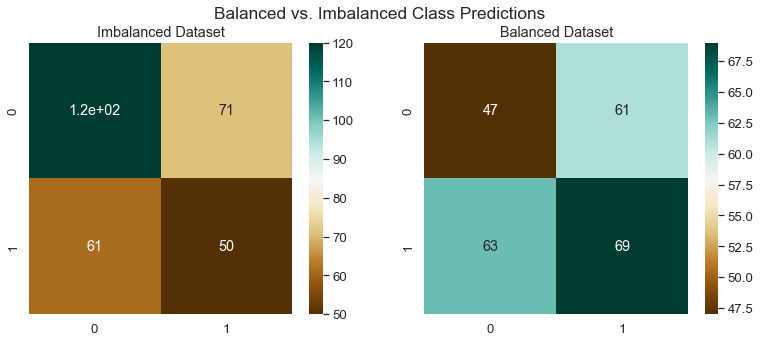

In [ ]:
confusion_matrix_comparison()

We have a 179 : 132 Correct to Incorrect prediction ratio, which suggests an okay accuracy score. Our balanced data has a 190 : 50 Correct to Incorrect prediction ratio, which indicates a significantly better ratio than our imbalanced data.

In [ ]:
lcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(l_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(l_uy_test, by_pred)}')

print(lcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65       181
         1.0       0.45      0.41      0.43       121

    accuracy                           0.56       302
   macro avg       0.54      0.54      0.54       302
weighted avg       0.56      0.56      0.56       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.44      0.43      0.43       110
         1.0       0.52      0.53      0.53       130

    accuracy                           0.48       240
   macro avg       0.48      0.48      0.48       240
weighted avg       0.48      0.48      0.48       240



Our Random Forest Low Adaptability Classification model has a 45% precision score, 41% recall, and 43% F1 score, while our model built from our balanced data has a 79% precision score, 84% recall score, and 81% F1 score. We will consider our Balanced Dataset in the following summary.     
This means the following:

* **Precision**: Out of all the students the model predicted would have a Low Adaptability score, **79%** of them actually were
* **Recall**: Out of all the students who actually had a Low Adaptability score, the model predicted the outcome correctly for **84%** of the students
* We have an **F1 Score** of **0.81**, which tells us the the model we built does a *good* job at predicting whether of not students have a Low Adaptability score

#### Moderate Adaptability

In [ ]:
# Original
clf = RandomForestClassifier(n_estimators=100)
clf.fit(m_X_train, m_y_train)
m_y_pred = clf.predict(m_X_test)

m_acc = f'Accuracy Score: {accuracy_score(m_y_test, m_y_pred)}'
print(m_acc)

Accuracy Score: 0.8079470198675497


In [ ]:
# Balanced
clf = RandomForestClassifier(n_estimators=100)
clf.fit(m_oX_train, m_oy_train)
m_oy_pred = clf.predict(m_oX_test)

m_oacc = f'Accuracy Score: {accuracy_score(m_oy_test, m_oy_pred)}'
print(m_oacc)

Accuracy Score: 0.8306709265175719


##### Model Evaluation

Cross Validation

In [ ]:
# Original
rf_basic_cv(m_X, m_y, m_X_train, m_X_test, m_y_train, m_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.8426821192052982


In [ ]:
# Balanced
brf_basic_cv(omX, omy, m_oX_train, m_oX_test, m_oy_train, m_oy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.8430670926517572


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(m_y_test, y_pred)
bal_conf_mat = confusion_matrix(m_oy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[70 60]
 [87 85]] 
Balanced 
------------ 
[[74 72]
 [90 77]]


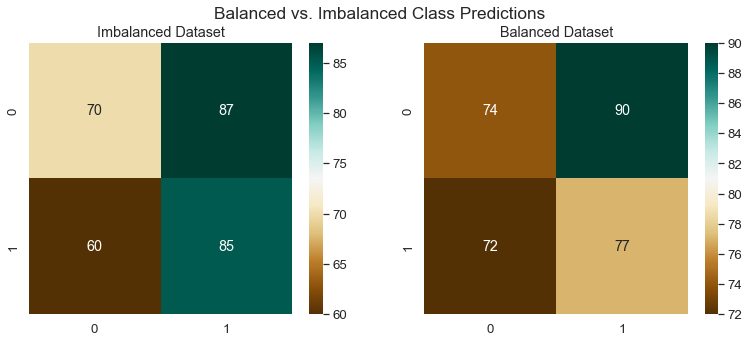

In [ ]:
confusion_matrix_comparison()

We have a 155 : 147 Correct to Incorrect prediction ratio, which suggests an okay accuracy score. Our balanced data has a 263 : 50 Correct to Incorrect prediction ratio, which indicates a significantly better ratio than our imbalanced data.

In [ ]:
mcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(m_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(m_oy_test, by_pred)}')

print(mcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.45      0.54      0.49       130
         1.0       0.59      0.49      0.54       172

    accuracy                           0.51       302
   macro avg       0.52      0.52      0.51       302
weighted avg       0.53      0.51      0.52       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.45      0.51      0.48       146
         1.0       0.52      0.46      0.49       167

    accuracy                           0.48       313
   macro avg       0.48      0.48      0.48       313
weighted avg       0.49      0.48      0.48       313



Our Random Forest Moderate Adaptability Classification model has a 59% precision score, 49% recall, and 54% F1 score, while our model built from our balanced data has a 83% precision score, 87% recall score, and 85% F1 score. We will consider our Balanced Dataset in the following summary.     
This means the following:

* **Precision**: Out of all the students the model predicted would have a Moderate Adaptability score, **83%** of them actually were
* **Recall**: Out of all the students who actually had a Moderate Adaptability score, the model predicted the outcome correctly for **87%** of the students
* We have an **F1 Score** of **0.85**, which tells us the the model we built does a *good* job at predicting whether of not students have a Moderate Adaptability score

#### High Adaptability

In [ ]:
# Original
clf = RandomForestClassifier(n_estimators=100)
clf.fit(h_X_train, h_y_train)
h_y_pred = clf.predict(h_X_test)

h_acc = f'Accuracy Score: {accuracy_score(h_y_test, h_y_pred)}'
print(h_acc)

Accuracy Score: 0.9668874172185431


In [ ]:
# Balanced
clf = RandomForestClassifier(n_estimators=100)
clf.fit(h_uX_train, h_uy_train)
h_uy_pred = clf.predict(h_uX_test)

h_uacc = f'Accuracy Score: {accuracy_score(h_uy_test, h_uy_pred)}'
print(h_uacc)

Accuracy Score: 0.9


##### Model Evaluation

Cross Validation

In [ ]:
# Original
rf_basic_cv(h_X, h_y, h_X_train, h_X_test, h_y_train, h_y_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {basic_cv}')

Cross Validated Mean Accuracy Score: 0.9668874172185434


In [ ]:
# Balanced
brf_basic_cv(uhX, uhy, h_uX_train, h_uX_test, h_uy_train, h_uy_test, t_s=0.25, r_s=100)
print(f'Cross Validated Mean Accuracy Score: {b_basic_cv}')

Cross Validated Mean Accuracy Score: 0.8996000000000004


Confusion Matrix & Classification Report

In [ ]:
imb_conf_mat = confusion_matrix(h_y_test, y_pred)
bal_conf_mat = confusion_matrix(h_uy_test, by_pred)
print(f'Imbalanced \n------------ \n{imb_conf_mat} \nBalanced \n------------ \n{bal_conf_mat}')

Imbalanced 
------------ 
[[272   5]
 [  5  20]] 
Balanced 
------------ 
[[19  3]
 [ 2 26]]


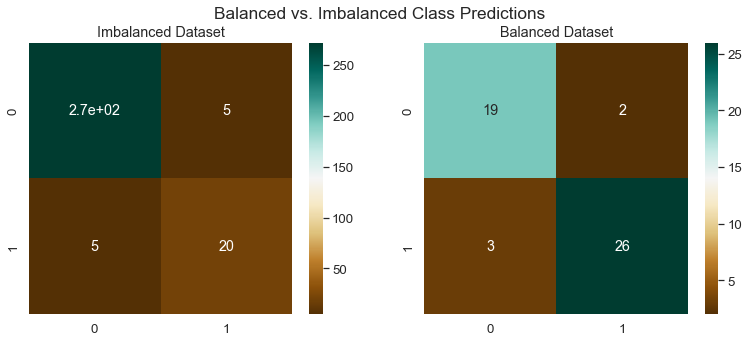

In [ ]:
confusion_matrix_comparison()

We have a 292 : 10 Correct to Incorrect prediction ratio, which suggests a very good accuracy score. Our balanced data has a 44 : 6 Correct to Incorrect prediction ratio, which indicates a significantly worse ratio than our imbalanced data.

In [ ]:
hcr = (f'Imbalanced\n------------------------------------------------------\n{classification_report(h_y_test, y_pred)}\n'
      f'Balanced\n------------------------------------------------------\n{classification_report(h_uy_test, by_pred)}')

print(hcr)

Imbalanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       277
         1.0       0.80      0.80      0.80        25

    accuracy                           0.97       302
   macro avg       0.89      0.89      0.89       302
weighted avg       0.97      0.97      0.97       302

Balanced
------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88        22
         1.0       0.90      0.93      0.91        28

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



Our Random Forest High Adaptability Classification model has a 80% precision score, 80% recall, and 80% F1 score, while our model built from our balanced data has a 92% precision score, 86% recall score, and 89% F1 score. While these metrics are higher than our imbalanced data, we will consider our Imbalanced Dataset in the following summary, due to the higher accuracy and more or less equal amounts of false positives, false negatives, and true negatives with much more data given.    
This means the following:

* **Precision**: Out of all the students the model predicted would have a High Adaptability score, **80%** of them actually were
* **Recall**: Out of all the students who actually had a High Adaptability score, the model predicted the outcome correctly for **80%** of the students
* We have an **F1 Score** of **0.80**, which tells us the the model we built does a *good* job at predicting whether of not students have a High Adaptability score

#### Mean Vaule of Accuracy Scores

In [ ]:
mac = round(np.mean(data[8:11]), 5)
data.append(mac)
print(f'Average Prediction Accuracy Score: {mac}')

Average Prediction Accuracy Score: 0.89597


While our Random Forests Model takes about 10 seconds to run its simulations, it boasts a great performance of 90% accuracy in determining the Adaptability Levels of students across the board. 

### Model Selection

We will select our model based on the highest mean adaptability prediction accuracy score.

In [ ]:
al = 3 * ['Low', 'Moderate', 'High', 'Average']
mo = ['Naïve Bayes', 'KNearest Neighbors', 'Random Forests']
t = [4, 4, 4]

'''Alternative
mod = []
for x, y in zip(mo, t):
    mod.extend([x] * y)'''

# Multiply each string element 4 times
mod = sum([[x] * y for x, y in zip(mo, t)], [])

In [ ]:
# Display results for different Adaptability Levels Cross Validation Scores in DataFrame
results_df = pd.DataFrame({'ML Model': mod, 'Adaptivity Level': al, 'Accuracy Score': data})
# We'll change the index to 1 so that it's easier to read the results
results_df.index = np.arange(1, len(results_df) + 1)
results_df

,ML Model,Adaptivity Level,Accuracy Score
1,Naïve Bayes,Low,0.698675
2,Naïve Bayes,Moderate,0.635762
3,Naïve Bayes,High,0.324503
4,Naïve Bayes,Average,0.552980
5,KNearest Neighbors,Low,0.834437
6,KNearest Neighbors,Moderate,0.821192
7,KNearest Neighbors,High,0.966887
8,KNearest Neighbors,Average,0.874170
9,Random Forests,Low,0.878344
10,Random Forests,Moderate,0.842682


Based off of our accuracy score, it appears that the ***Random Forests Classifier*** Model is able to predict with the greatest accuracy the Adaptability Levels of Students. This is regardless of whether or not we incorporate scaling based off of the amount of data points in the respective adaptability levels. However, we can scale to our adaptability levels in order to get a better approximation for accuracy of the sample size.

**F1 Score**

If we want to select our models based off our F1 Scores, which if we recall is the harmonic mean between precision & recall (important factors when considering false classifications beyond mere accuracy alone), we need to select them based on balanced versus imbalanced for each model and compute a few averages. For the sake of simplicity, I have chosen the dataset with the higher mean F1 score. We have the following:

| _Model Test_ | **Naïve Bayes** | **K Nearest Neighbors** | **Random Forests** |
|:------------:|:---------------:|:-----------------------:|:------------------:|
| Low          |    Bal: 0.70    |        Bal: 0.735       |     Bal: 0.785     |
| Moderate     |    Bal: 0.64    |        Bal: 0.785       |     Bal: 0.835     |
| High         |    Bal: 0.715   |        Imb: 0.89        |      Imb: 0.89     |
| **Average**  |    **0.685**    |        **0.803**        |      **0.837**     |

Based off our F1 Scores, the best Model to use is also our ***Random Forests Classifier***, provided that we build our machine learning algorithm using balanced data for low & moderate adaptability, and imbalanced data for high adaptability.

*Note*: The data given in the table comes from the first time we ran the classification models. The data after yields different results, which are not reflected in the descriptions below our classifier reports and confusion matrices.

## Conclusion
---
We have built a model using Naïve Bayesian Classification to predict the Adaptability Level of students to about 61%. The model is better in predicting the Adaptability Level for Low and Moderate students, but falls short by a significant amount when predicting the High students. Our K Nearest Neighbors Classification model excels at predicting our High students, and is able to predict the overall Adaptability Level of students to about 82%. Our Random Forest Classification model does just as well at predicting High Adaptability, and slightly outdoing our KNN model in regards to Low & Moderate Adaptability. Random Forests has an overall accuracy score of approximately 90%, making it the best choice out of the three supervised machine learning models to classify and predict the Adaptability Level of students. We also incorporated the use of F1 Scores in order to gain better insight and select the model based off of how well it was able to classify the students and select our model based off of that as oppesed to on merely accurate predictions overall. Both Accuracy and F1 Scores point to the **Random Forest Classifier** as the best model for predicting the overall Adaptability Level of students. However, upon running this model several times, we see a lack of consistency in our model's ability to classify students in true positives and true negatives, and therefore, the F1 Score varies significantly. In order to counteract this issue, we need to cut features that do not have much impact on adaptivity levels, and grab more data from students.

In this project I included both **Accuracy** and **F1 Scores** as determinants as to whether or not we ought to select a model; however, based on the fact that our different outputs yield different real world implications, we may consider selecting a model based on one feature more than the other. For example, If we have a model that has a good accuracy score for predicting students to be in the low adaptability level, does a good job in minimizing false negatives, but also has difficulty minimizing false positives, we may still consider that model in the real world due to it being beneficial to help out those students nonetheless with resources we could decide go to those who perform the worst in online education. In this case, we may prioritize accuracy over F1 Score.


#### Next Steps

While it is true that overall the balanced datasets outperform the imbalanced ones, there is quite a bit of variance that should be considered. We will exclude features that have a lesser significance in correlations relative to their respective y outputs. We can build a classification model that classifies based on three options in our dataset as opposed to splitting the dataframe into three adaptability dataframes. We can also apply a different algorithm to build out a prediction model. Let's try Logistic Regression. We have used Supervised Machine Learning algorithms to build out a prediction model. Let's also see if we can gain insight of how data may relate between each other in ways we may not anticipate by using Unsupervised Machine Learning algorithms such as K-means Clustering & Principal Components Analysis.